# Hotspotdetection

## Simple example

Bellow an example of how to run Hotspotdetection

In [1]:
import sys
sys.path.append('../../allgo')

import allgo as ag
print(ag.__version__)
print(ag.__file__)

import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

import ntpath
from IPython.display import clear_output

0.2.0
../../allgo/allgo/__init__.py


## Load the data

In this section we load the data and display it in a interactive viewer

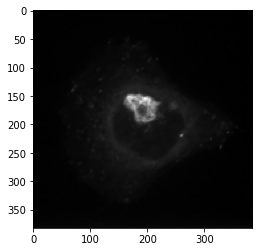

In [6]:
# visualize input image
input_image_path = '../Data/hotspotdetection.tif'
input_image = imageio.imread(input_image_path)
plt.imshow(input_image,cmap = 'gist_gray')

## Connection to Allgo 

In [4]:
token = None # put your token.
client = ag.Client(token)
print("You have got a connexion to {}".format(client.allgo_url))

You have got a connexion to https://allgo18.inria.fr


## Interactive parameters selection

In [10]:
# Interactive parameters selection
output_image = None

def run_hotspotdetection(patch, neighborhood, p_value):
    global output_image

    files = [ input_image_path ]
    params = '-m ' + str(patch) + ' -n ' + str(neighborhood) + ' -pv ' + str(p_value)
    out_dict1 = client.run_job('Hotspotdetection', files = files, params = params)
    job_id = out_dict1['id']
    print(out_dict1)
    url = out_dict1[str(job_id)]['output.tif']
    print("job_id = ", job_id)
    
    outdir = "../Output"
    filepath = client.download_file(file_url = url, outdir = outdir , force = True)
    print(filepath)
    output_image = imageio.imread(filepath)

    plt.figure(figsize = (10,80))
    plt.subplot(1, 2, 1)                      
    plt.imshow(input_image,cmap = "gist_gray")
    plt.subplot(1, 2, 2)
    plt.imshow(output_image)
    plt.show()
    
interact_manual(run_hotspotdetection, patch = (1, 6) , neighborhood = (0,10), p_value = (0,0.4,0.001))


interactive(children=(IntSlider(value=3, description='patch', max=6, min=1), IntSlider(value=5, description='n…

<function __main__.run_hotspotdetection(patch, neighborhood, p_value)>